#1. 모델 읽어 오기
> 학습이 오래 걸림으로 기존에 저장해 놓은 모델을 배포하고 이를 이용하여 수업을 진행하자.

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

#2. 그래프를 이용한 데이터 분석

> 이 그래프는 과대적합의 특성을 보여준다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달한다. 반면 검증 정확도는 70% 주위에서 변화하고 있다.

> 이 그래프 역시 과대적합의 특성을 보여준다. 검증 손실은 epoch가 증가할 수록 점점 올라가고 있는 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소하고 있다.

> 이렇게 과적합 현상이 일어나는 것은 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 나타나는 문제이다. 

> 여기에서는 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 데이터 증식에 대해 알아 보자

#3. 데이터 증식 사용하기

> 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생한다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 랜덤하게 생성하는 방법이다.

##3.1 ImageDataGenerator

> ImageDataGenerator에 다음과 같은 파라미터를 이용하여 랜덤한 이미지를 추가할 수 있다.
* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위이다(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위이다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 기울림을 적용할 각도 범위이다.
* `zoom_range`는 랜덤하게 사진을 확대, 축소할 범위입니다.
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 있을 때 사용한다(예, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 때 사용한다.
  - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
  - 'nearest': aaaaaaaa|abcd|dddddddd
  - 'reflect': abcddcba|abcd|dcbaabcd
  - 'wrap': abcdabcd|abcd|abcdabcd


참조 : https://keras.io/ko/preprocessing/image/

##3.2 랜덤 이미지 확인
> 위의 ImageDataGenerator을 이용하여 변경된 이미지를 간단하게 확인해 보자

> 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지는 않는다. 그래서 위처럼 약간의 변화를 주어 학습 시킴으로써 과적합을 방지할 수 있다. 하지만 새로운 정보를 만들어낸 것이 아니고 단지 기존 정보의 재조합만으로 만들어진 이미지이다 보니 완전히 과대적합을 제거하기에 충분하지 않을 수 있다.

#4. Dropout
> Dropout은 과적합을 방지하기 위한 방법 중 하나이다.

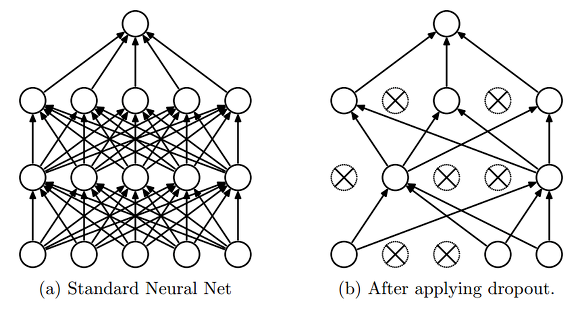

> 적은 데이터로 많은 학습을 하게 되면 학습데이터에 과적합될 가능성이 높아진다. Dropout은 네트워크의 모든 값을 사용하는 것이 아닌 일부만 사용하여 과적합을 해결하는 방법이다.

> 참조 : https://mongxmongx2.tistory.com/26

> 45분정도 소요됨

결과 그래프를 다시 그려 보죠:

그림 5-12와 5-13을 참고하세요. 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 다음 두 절에서 이에 대해 집중적으로 살펴보겠습니다.